In [19]:
import pandas as pd
import numpy as np


In [20]:
df=pd.read_excel("E:\Data Science\Pandas Dataset\ML_Dis_2011_2022.xlsx",header=1)

In [21]:
df.head(20)

,Date,soil_moisture,evaporation,temperature,precipitation,Discharge
0,2011-01-08,1746.878006,-73.838229,272.033594,3.973181,5508.901250
1,2011-01-09,1745.363481,-72.903502,270.861079,5.930892,5366.737589
2,2011-01-10,1750.972664,-70.267049,269.770267,5.114975,5262.266339
3,2011-01-11,1744.604323,-71.054032,269.687682,1.141312,5195.487500
4,2011-01-12,1734.241739,-66.076978,271.160384,0.883896,5166.401071
5,2011-01-13,1732.348584,-59.066157,271.729931,2.614494,5137.314643
6,2011-01-14,1735.684698,-57.703613,271.424550,2.721928,5108.228214
7,2011-01-15,1741.987363,-59.983405,271.330212,7.822264,5079.141786
8,2011-01-16,1847.263733,-61.211875,269.215322,27.775222,5050.055357
9,2011-01-17,1907.613278,-72.865880,268.723173,8.614004,5020.968929


<Axes: >

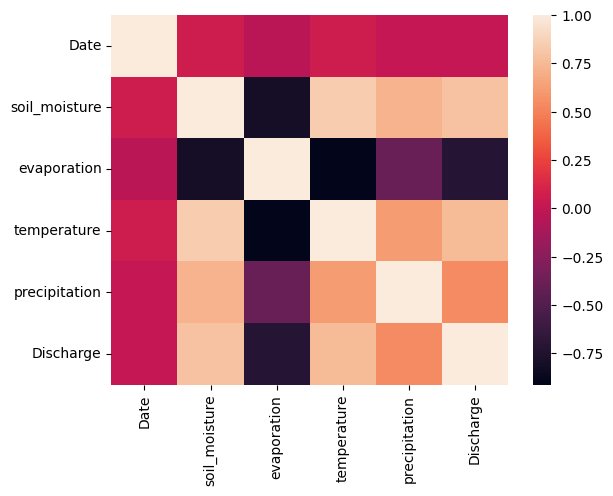

In [22]:
import seaborn as sns
sns.heatmap(df.corr())

In [23]:
df["Date"]=pd.to_datetime(df["Date"])

<Axes: xlabel='Date', ylabel='Discharge'>

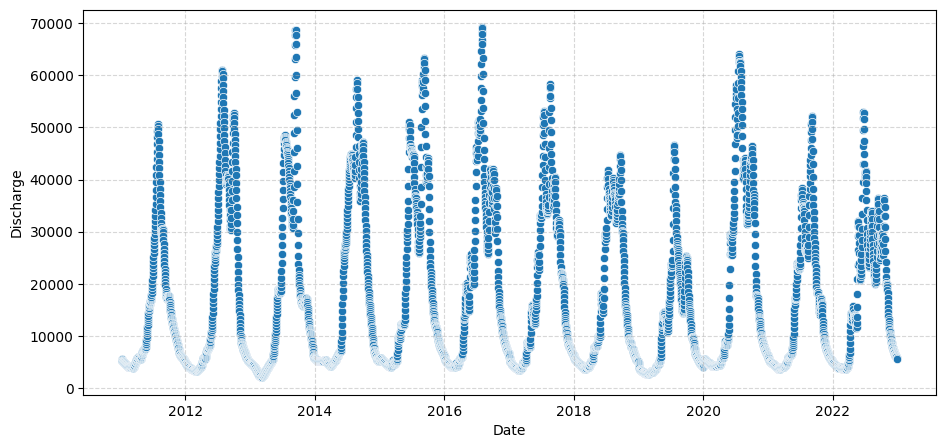

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(11, 5))
plt.grid(True, linestyle="--", alpha=0.5)
sns.scatterplot(x='Date',y='Discharge',data=df)

# Code to use 7 days row as x value and the 8th y value as y.

In [25]:
df_features = df[["temperature", "precipitation", "Discharge"]]

# Create Sliding Window for 7 Days of Features and 8th Day as Target
days = 7
X = []
y = []

for i in range(1,len(df) - days):  # Last 7 days as input, next day as target
    X.append(df_features.iloc[i:i+days].values.flatten())  # Flatten past 7 days
    y.append(df_features.iloc[i+days]["Discharge"])  # Discharge on the 8th day


In [26]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)
xgb_model = XGBRegressor()

xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(r2)

0.998629629611969


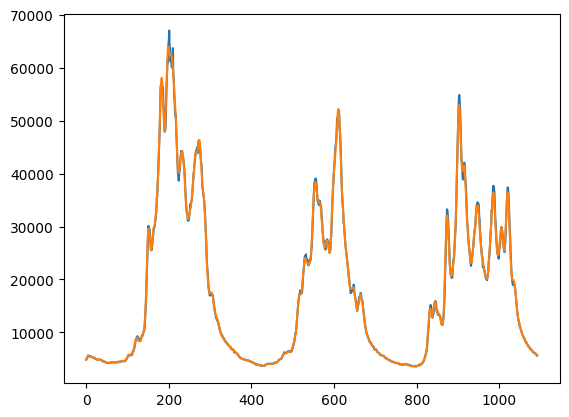

In [27]:
plt.plot(y_pred, label="True")
plt.plot(y_test, label="True")

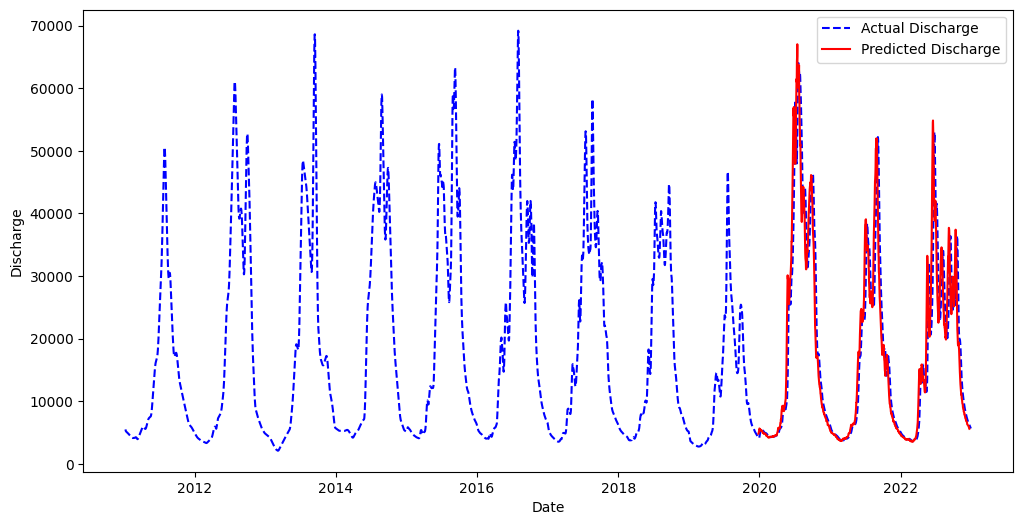

In [28]:
import matplotlib.pyplot as plt

# Create a date range for the test set
test_dates = df["Date"].iloc[len(y_train):len(y_train) + len(y_test)].values

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(df["Date"], df["Discharge"], label="Actual Discharge", color="blue", linestyle="dashed")
plt.plot(test_dates, y_pred, label="Predicted Discharge", color="red", linestyle="solid")
plt.xlabel("Date")
plt.ylabel("Discharge")
plt.legend()


plt.legend()
plt.show()


In [29]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
x_test_scaled=scaler.transform(X_test)


In [30]:

xgb_model = XGBRegressor()

xgb_model.fit(X_train_scaled, y_train)
y_pred = xgb_model.predict(x_test_scaled)

r2 = r2_score(y_test, y_pred)
print(r2)

0.9986625909805298
